# Simulating optical auto correlation of a pulsed laser (with chirp)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants
from scipy import integrate
from scipy import fftpack

from IPython.core.debugger import set_trace

In [2]:
path = r"../../Data/Autocorrelator/Simulation/Autocorrelation_Simulation_Gauss_2018-09-27 14_31_40.168764.txt"

## Change alpha_values and lambda_laser if necessary!

Central wavelength $\lambda$ = 785e3 (pm).

In [3]:
alpha_values = np.array((0, 1e-2, 10))

lambda_laser = 785e3
frequency_laser = constants.c / lambda_laser

In [4]:
data = np.loadtxt(path)

In [5]:
tau_values_1 = data[:, 0]
I_M_gauss_values_1 = data[:, 1:]

In [6]:
tau_limit = tau_values_1[-1]

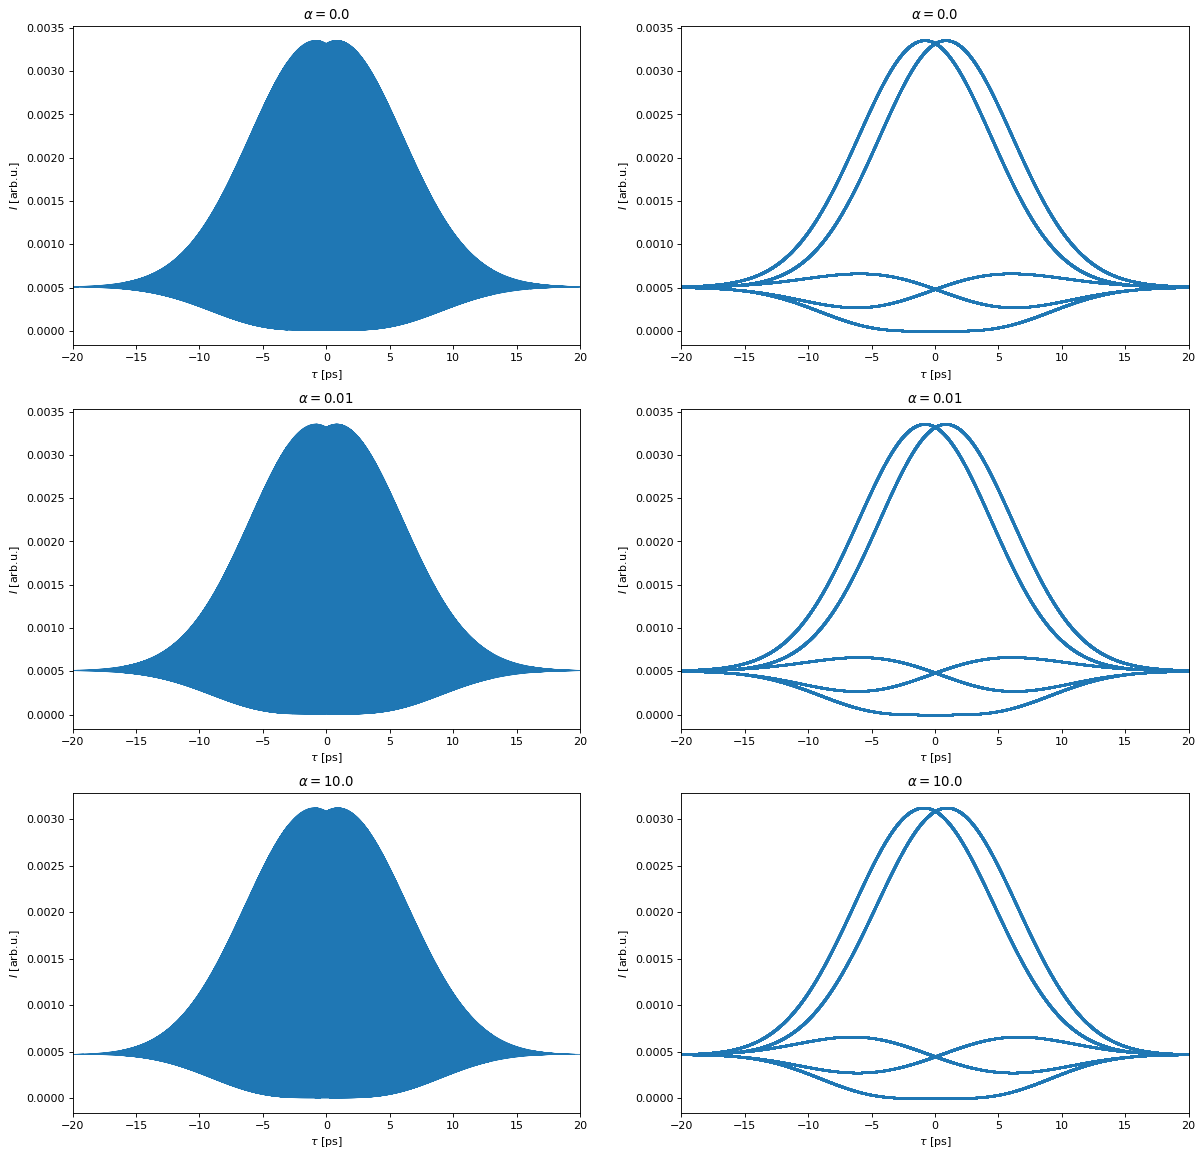

In [7]:
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(18, 18), dpi=80)

for i in range(alpha_values.size):
    plt.subplot(alpha_values.size, 2, 2 * i + 1)
    plt.title(r"$\alpha = {}$".format(alpha_values[i]))
    plt.xlabel(r"$\tau$ [ps]")
    plt.ylabel(r"$I$ [arb.u.]")
    plt.xlim(-tau_limit, tau_limit)
    plt.plot(tau_values_1, I_M_gauss_values_1[:,i], linewidth=0.2)
   
    
    plt.subplot(alpha_values.size, 2, 2 * i + 2)
    plt.title(r"$\alpha = {}$".format(alpha_values[i]))
    plt.xlabel(r"$\tau$ [ps]")
    plt.ylabel(r"$I$ [arb.u.]")
    plt.xlim(-tau_limit, tau_limit)
    plt.plot(tau_values_1, I_M_gauss_values_1[:,i], ".", markersize=2)    

plt.show()

## FFT
Transform interpolated signal into frequency-space per FFT.

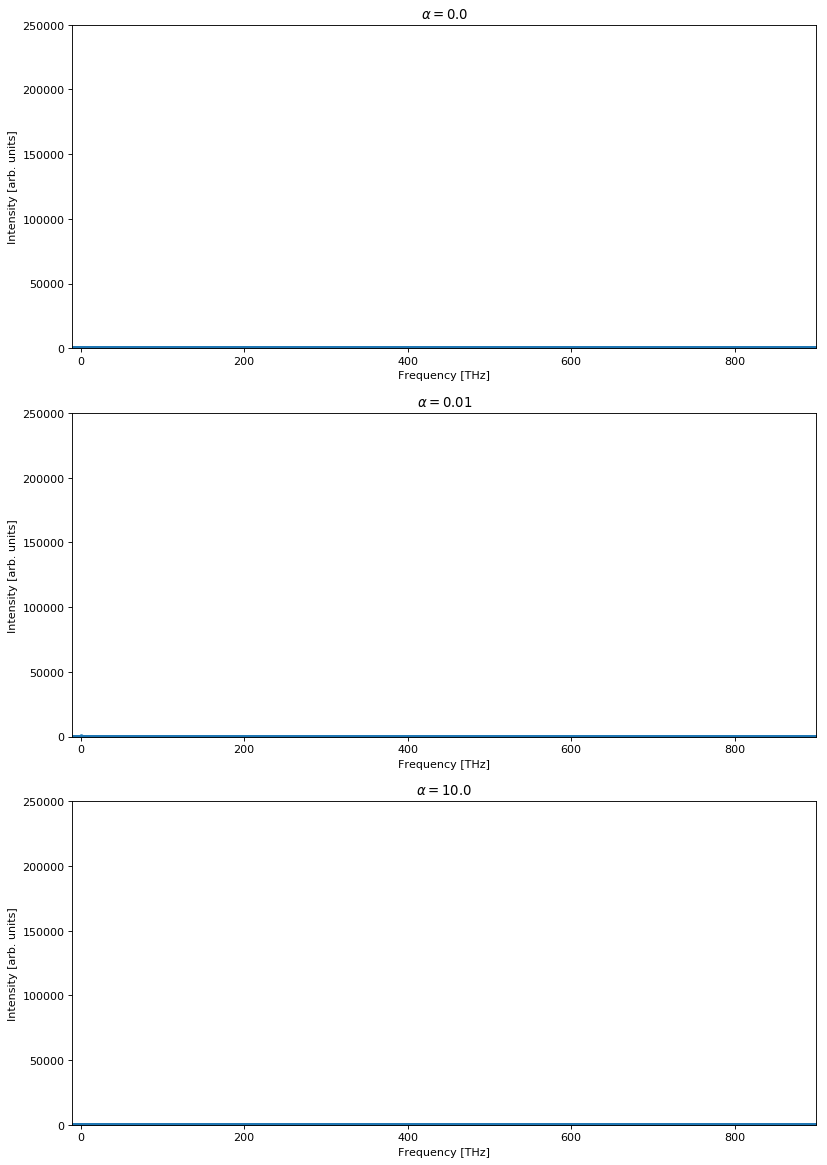

In [8]:
# Plot the FFT power
plt.figure(figsize=(12, 10), dpi=80)
plt.subplots_adjust(top = 1.5)

sample_freq_gauss = np.empty(tau_values_1.size)
I_M_gauss_fft = np.empty((tau_values_1.size, alpha_values.size), dtype=complex)

for i in range(alpha_values.size):
    # The FFT of the signal
    I_M_gauss_fft[:, i] = fftpack.fft(I_M_gauss_values_1[:,i])
    # And the power (sig_fft is of complex dtype)
    data_power = np.abs(I_M_gauss_fft[:, i])
    # The corresponding frequencies
    sample_freq_gauss = fftpack.fftfreq(I_M_gauss_values_1[:,i].size,
                                        d = tau_limit * 2 / tau_values_1.size)
    
    plt.subplot(alpha_values.size, 1, i + 1)
    plt.title(r"$\alpha = {}$".format(alpha_values[i]))
    plt.xlabel('Frequency [THz]')
    plt.ylabel('Intensity [arb. units]')
    plt.xlim(-10, 900)
    plt.ylim(0, 250000)
    plt.plot(sample_freq_gauss, data_power, ".")

plt.show()

## Implement Filter
Citation from MOSAIC paper:
"The bandpass filter functions were taken as rectangular functions centered at $\omega$
and $2\omega$ having bandwidths of $\omega$.

Alternative with "correct" filter implementations:

Scipy Signal Filter Tutorial (https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html)

How many taps? (https://dsp.stackexchange.com/a/31210)

In [9]:
I_M_gauss_filtered_fft = I_M_gauss_fft.copy()

for j in range(alpha_values.size):
    for i in range(data_power.size):
        if frequency_laser * 0.5 < abs(sample_freq_gauss[i]) < frequency_laser * 1.5:
            I_M_gauss_filtered_fft[i, j] = 0
        if frequency_laser * 1.5 < abs(sample_freq_gauss[i]) < frequency_laser * 2.5:
            I_M_gauss_filtered_fft[i, j] = I_M_gauss_filtered_fft[i, j] * 2

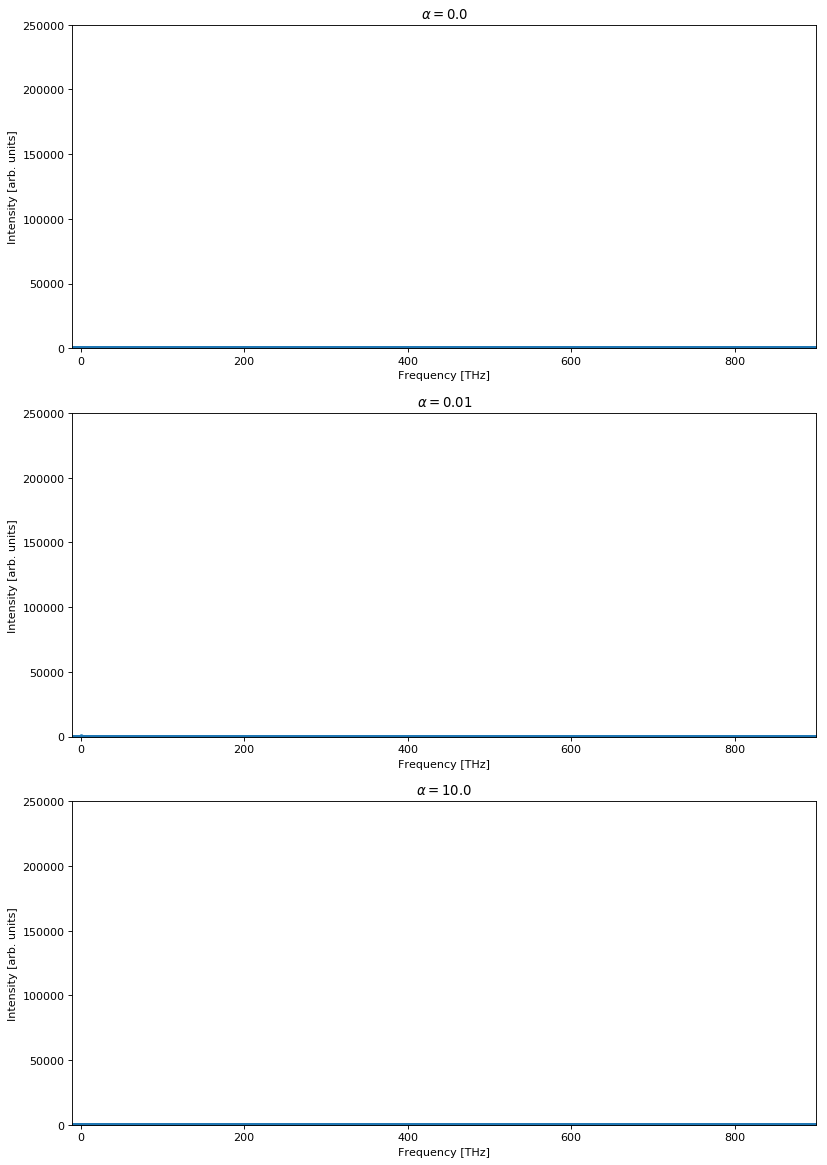

In [14]:
# Plot the FFT power
plt.figure(figsize=(12, 10), dpi=80)
plt.subplots_adjust(top = 1.5)

for i in range(alpha_values.size):
    data_power = np.abs(I_M_gauss_filtered_fft[:, i])
    
    plt.subplot(alpha_values.size, 1, i + 1)
    plt.title(r"$\alpha = {}$".format(alpha_values[i]))
    plt.xlabel('Frequency [THz]')
    plt.ylabel('Intensity [arb. units]')
    plt.xlim(-10, 900)
    plt.ylim(0, 250000)
    plt.plot(sample_freq_gauss, data_power, ".")

plt.show()

## Inverse FFT
Transform filtered signal back into time-space per inverse FFT.

In [11]:
I_M_gauss_filtered_values = np.empty((tau_values_1.size, alpha_values.size))
for i in range(alpha_values.size):
    I_M_gauss_filtered_values[:,i] = np.real(
        fftpack.ifft(I_M_gauss_filtered_fft[:, i]))

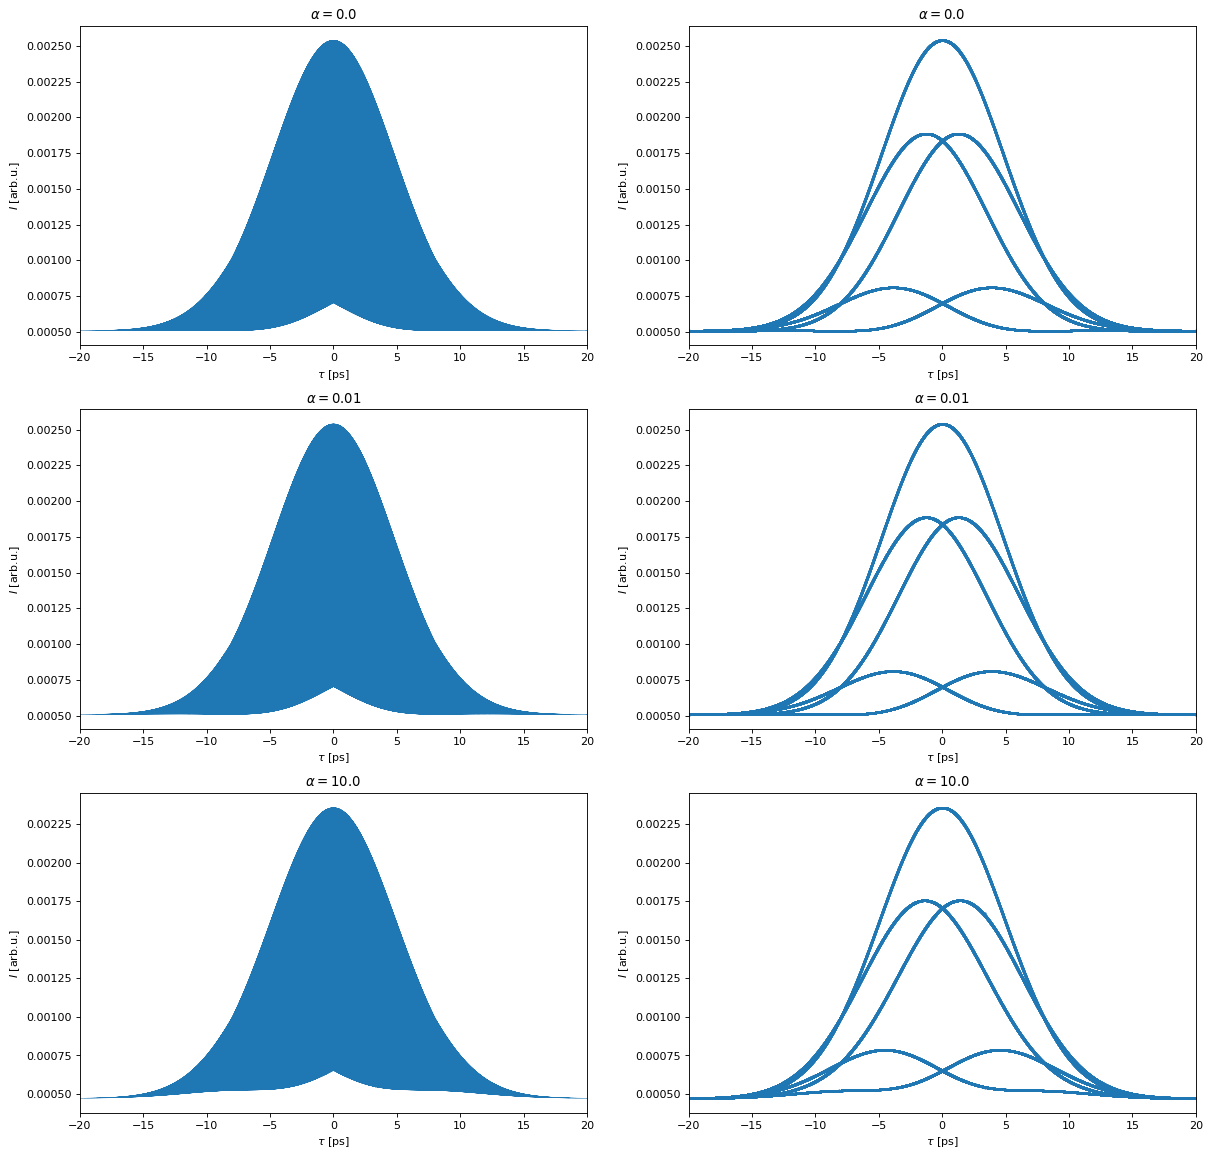

In [12]:
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(18, 18), dpi=80)

for i in range(alpha_values.size):
    plt.subplot(alpha_values.size, 2, 2 * i + 1)
    plt.title(r"$\alpha = {}$".format(alpha_values[i]))
    plt.xlabel(r"$\tau$ [ps]")
    plt.ylabel(r"$I$ [arb.u.]")
    plt.xlim(-tau_limit, tau_limit)
    plt.plot(tau_values_1, I_M_gauss_filtered_values[:,i], linewidth=0.2)
   
    
    plt.subplot(alpha_values.size, 2, 2 * i + 2)
    plt.title(r"$\alpha = {}$".format(alpha_values[i]))
    plt.xlabel(r"$\tau$ [ps]")
    plt.ylabel(r"$I$ [arb.u.]")
    plt.xlim(-tau_limit, tau_limit)
    plt.plot(tau_values_1, I_M_gauss_filtered_values[:,i], ".", markersize=2)    

plt.show()